In [50]:
import pandas as pd


lista_csvs = [1, 2, 3, 4, 5, 6, 7, 8]

dfs = []

for element in lista_csvs:
    df_ratings = pd.read_csv(f"../Datasets/ratings/{element}.csv") # Lee el archivo CSV correspondiente
    dfs.append(df_ratings) # Agrega el dataframe a una lista de dataframes

result = pd.concat(dfs, ignore_index=True) # Concatena todos los dataframes en uno solo, ignorando los índices originales



In [51]:

df_ratings.head(10)

,userId,rating,timestamp,movieId
0,108422,4.5,1350689762,as1399
1,108422,4.0,1350341401,as6724
2,108422,5.0,1350689691,ns512
3,108422,4.5,1350341088,ns7444
4,108422,4.5,1350689619,as2230
5,108422,5.0,1350341341,as8196
6,108422,4.0,1350689752,ns1326
7,108422,4.0,1350341119,as8569
8,108422,4.0,1350689747,hs2493
9,108422,4.5,1350689736,ns4456


## - To Do:
### - Dropearia timestamp
### - Agruparia de la mejor manera por movie id el resto de los campos y asi poder agregarle la info al dataframe_movies.
### - Calcular la puntuacion de cada movieId

In [52]:

# Agrupar por movieId y obtener listas de userId y rating, y promedio de rating
df_gby_movieid = df_ratings.groupby('movieId').agg({'userId': list, 'rating': [list, 'mean']}).reset_index()

# Renombrar columnas
df_gby_movieid.columns = ['movieId', 'userId', 'rating', 'prom_rating']

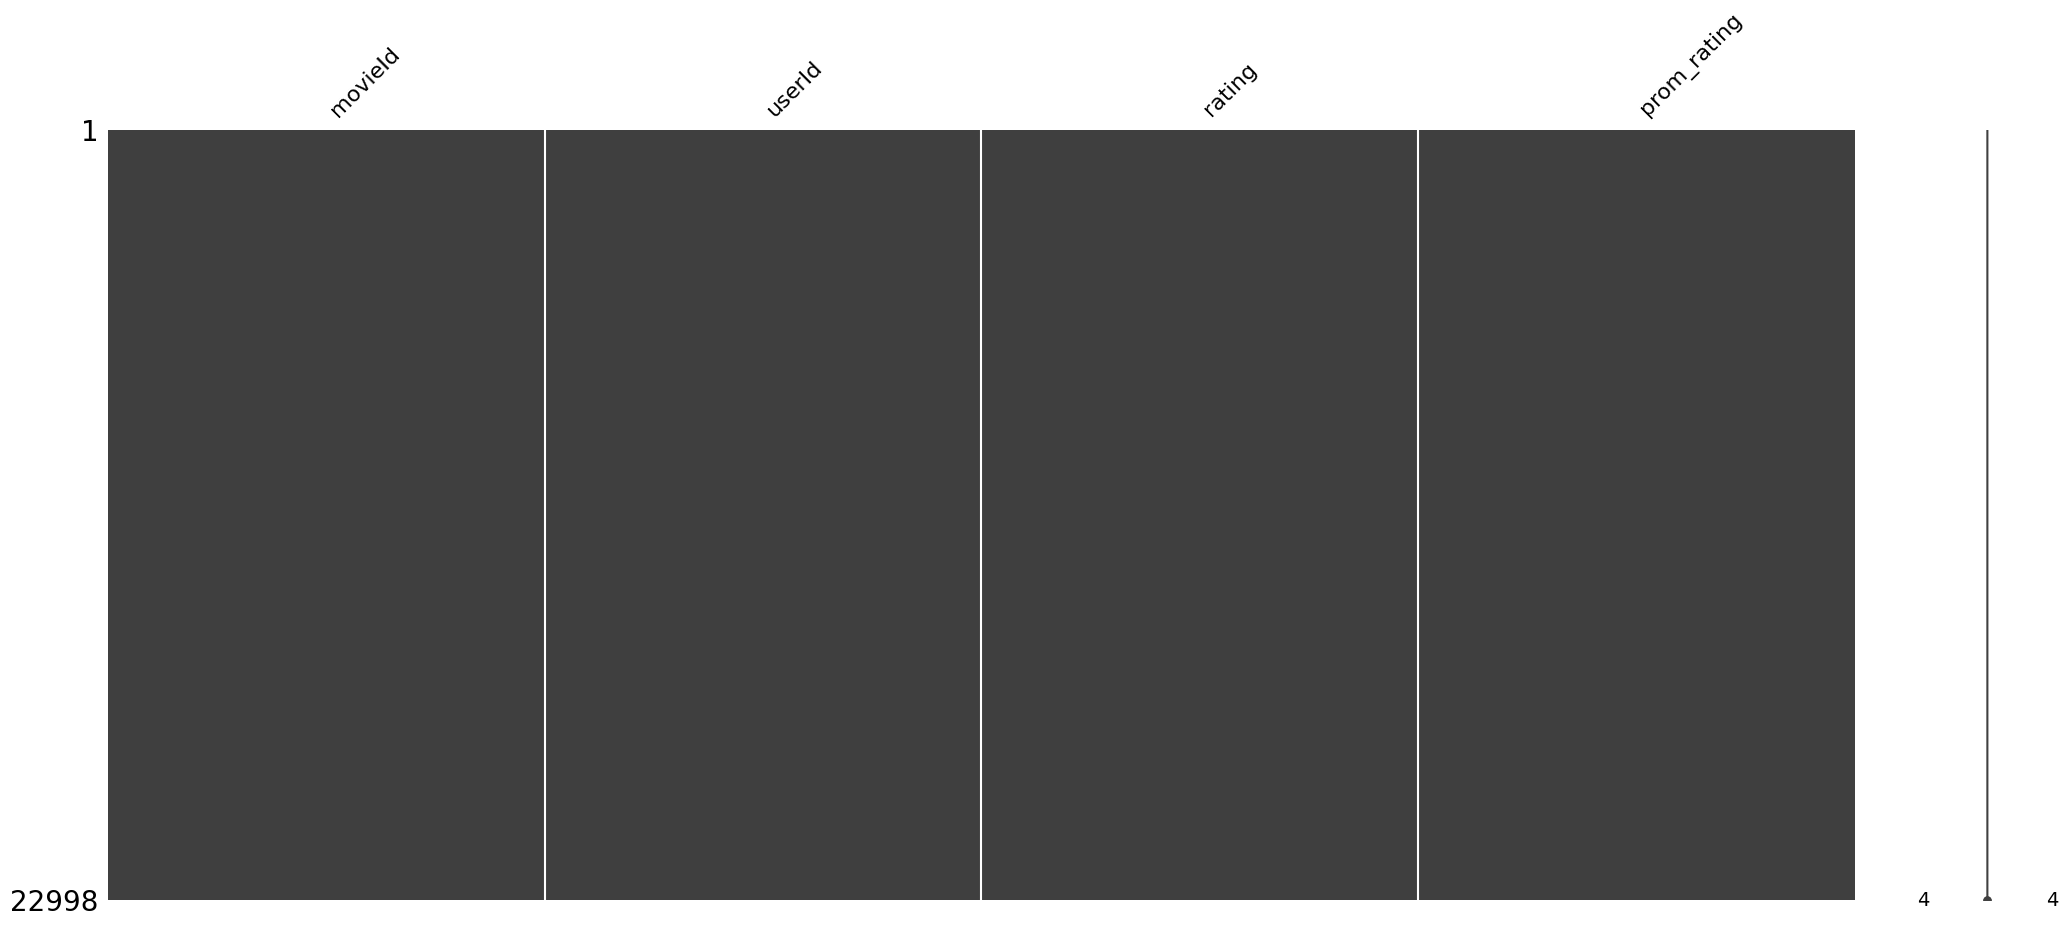

In [53]:
import missingno as msno
import matplotlib.pyplot as plt

# Crear gráfico Missingno
msno.matrix(df_gby_movieid)

# Mostrar el gráfico
plt.show()

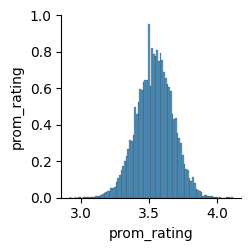

In [54]:
import seaborn as sns

# Crear pairplot
sns.pairplot(df_gby_movieid)

# Mostrar el gráfico
plt.show()

In [55]:
df_gby_movieid.tail(5)

,movieId,userId,rating,prom_rating
22993,ns995,"[108610, 108927, 108965, 109074, 109229, 10943...","[3.0, 5.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.5, 3.0, ...",3.436508
22994,ns996,"[108423, 108739, 108757, 108804, 109041, 10919...","[2.0, 3.0, 4.0, 3.0, 4.0, 4.5, 4.0, 5.0, 4.0, ...",3.615942
22995,ns997,"[109016, 109414, 109519, 109709, 110150, 11022...","[4.0, 3.5, 3.5, 3.5, 4.0, 4.5, 4.0, 4.5, 1.0, ...",3.655738
22996,ns998,"[109112, 109478, 109943, 110052, 110183, 11048...","[4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 0.5, 4.0, 3.0, ...",3.541096
22997,ns999,"[108560, 108933, 109539, 109873, 110269, 11048...","[4.0, 4.0, 4.0, 5.0, 2.0, 4.0, 1.5, 2.5, 2.0, ...",3.578571


In [56]:
df_gby_movieid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      22998 non-null  object 
 1   userId       22998 non-null  object 
 2   rating       22998 non-null  object 
 3   prom_rating  22998 non-null  float64
dtypes: float64(1), object(3)
memory usage: 718.8+ KB


In [57]:

import os

# Ruta del archivo pickle
pickle_file = '../Datasets/Datasets_cleaned_ETL/ratings_cleaned/df_ratings_gby_movies.pkl'

# Verificar si el archivo existe
if os.path.exists(pickle_file):
    # Eliminar el archivo existente
    os.remove(pickle_file)

# Guardar el dataframe como archivo pickle
df_gby_movieid.to_pickle(pickle_file)
